### Import Packages and Fetch Data

In [1]:
# Setup
import numpy as np
import pandas as pd
import os

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images/after_preprocessing_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Importing the dataset
BRFSS2020 = pd.read_csv('dataset/BRFSS2020.csv')

BRFSS2020.head()

,_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,_psu,ctelenm1,...,_rfpsa23,_clnscpy,_sgmscpy,_sgms10y,_rfblds4,_stoldna,_vircoln,_sbontim,_crcrec1,_aidtst4
0,1,1,1042020,1,4,2020,1100,2020000001,2020000001,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1,1,2072020,2,7,2020,1200,2020000002,2020000002,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1,1,1232020,1,23,2020,1100,2020000003,2020000003,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1,1,1092020,1,9,2020,1100,2020000004,2020000004,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1,1,1042020,1,4,2020,1100,2020000005,2020000005,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


### Visualizing the Data

Saving figure attribute_histogram_plots_before_preprocessing


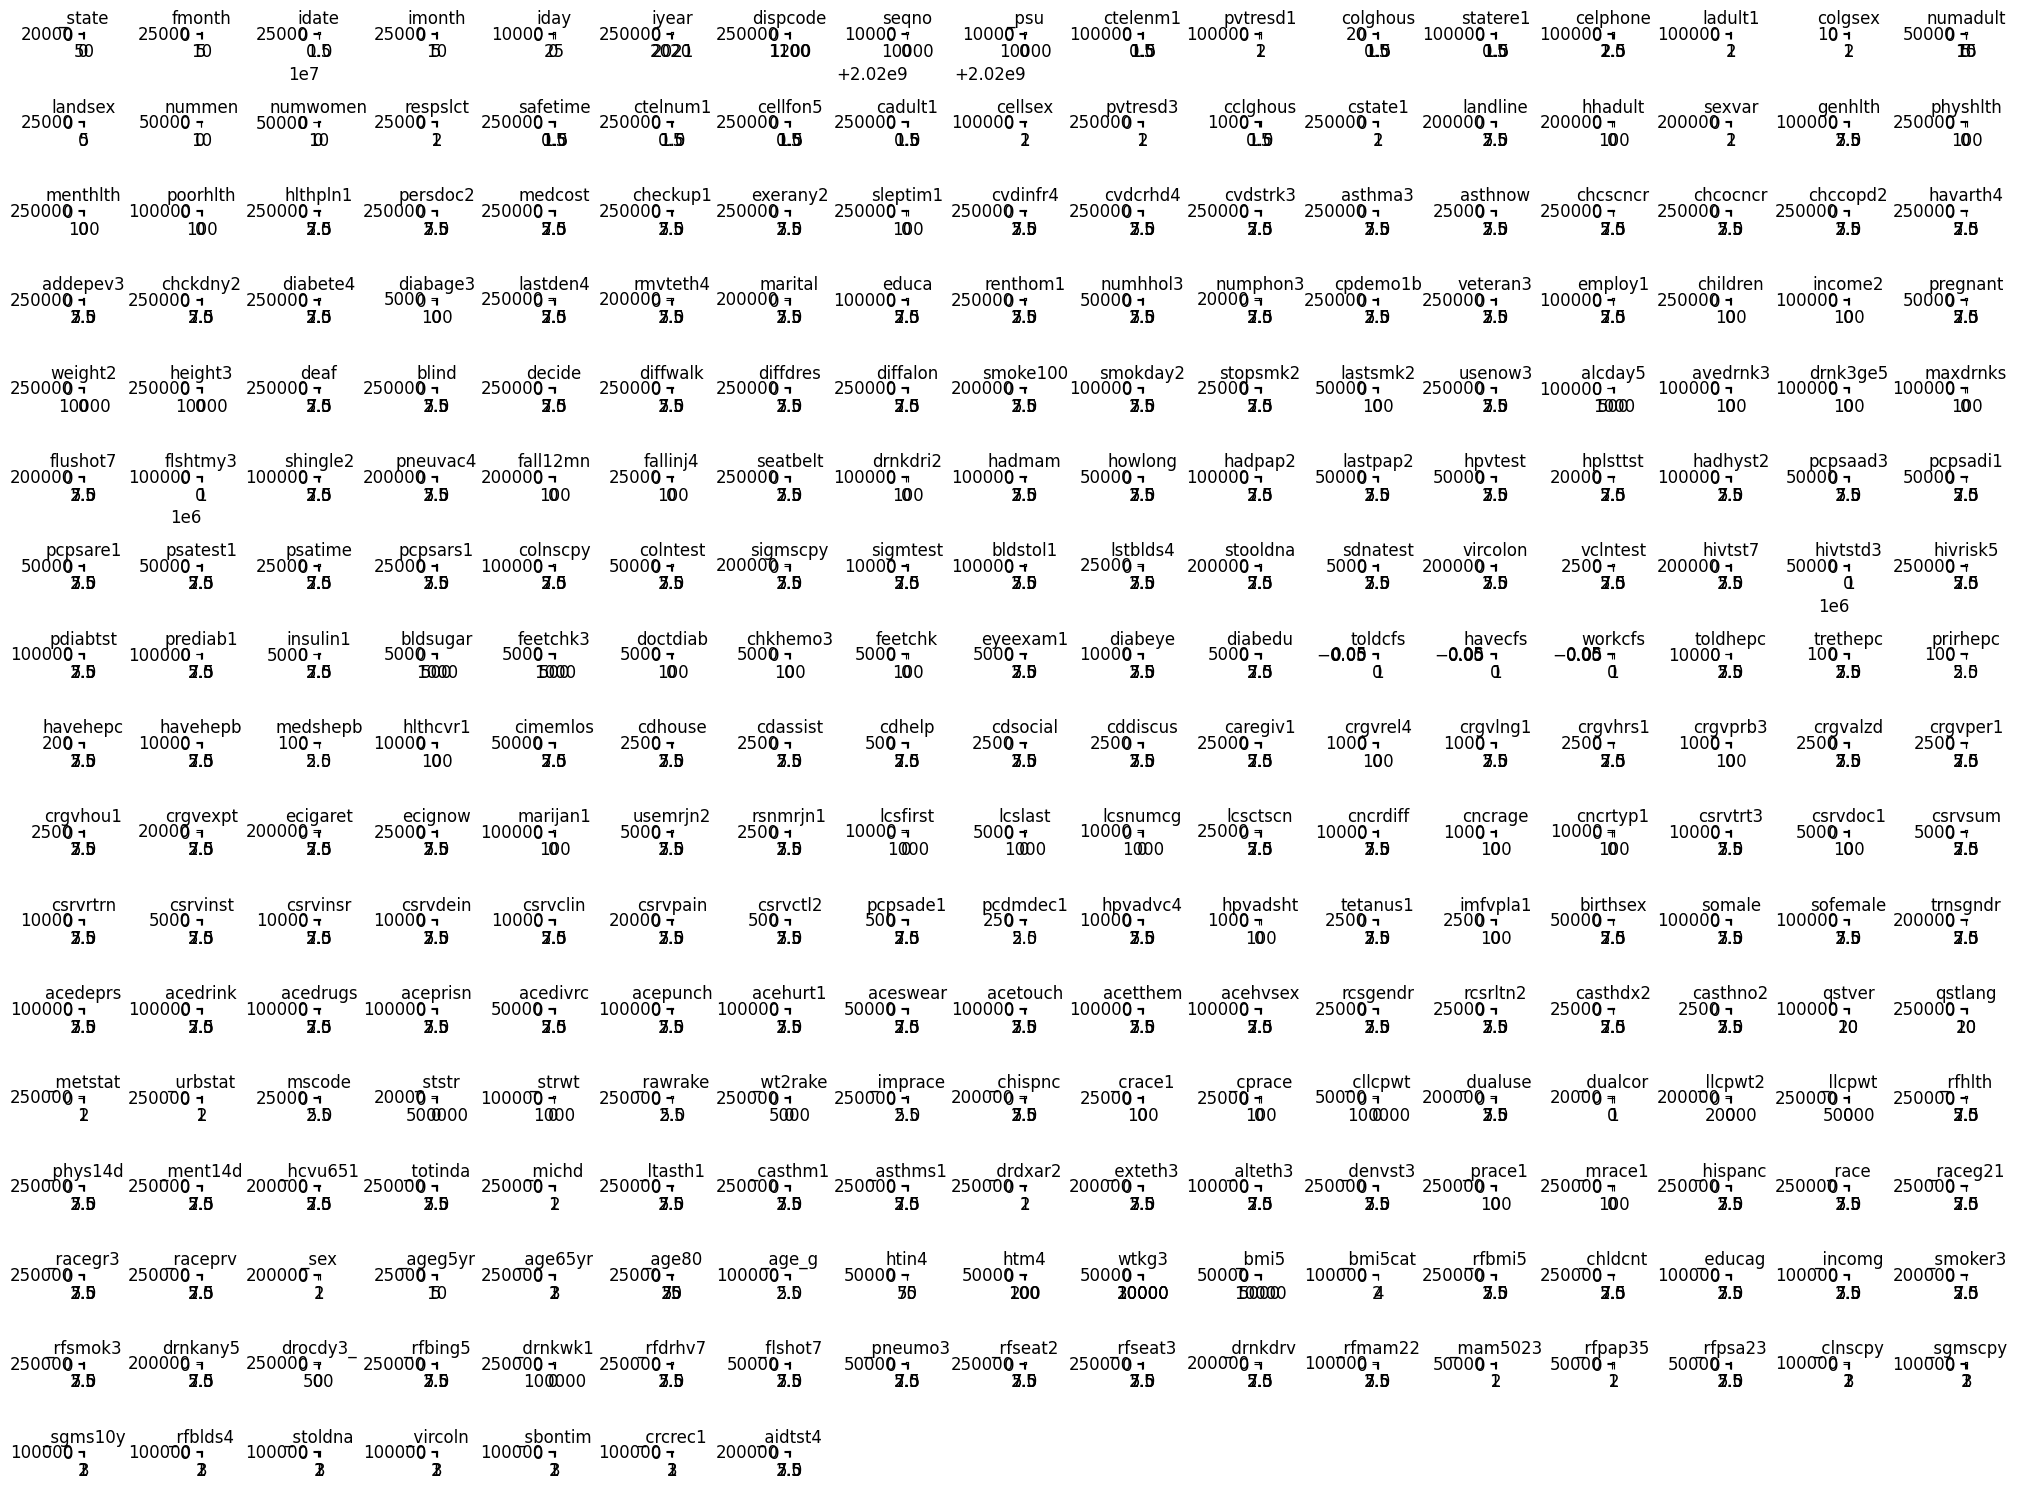

In [2]:
BRFSS2020.hist( bins=50,figsize=(20,15))
save_fig("attribute_histogram_plots_before_preprocessing")
plt.show()

### Experimenting with Attribute Combinations

### Data Cleaning

We are going to create a new dataset with relevant data to minimize all the noise.

['heartDisease', 'BMI', 'smoking', 'alcoholDrinking', 'stroke','physicalHealth', 'mentalHealth', 'diffWalking', 'sex', 'ageCategory', 'race', 'diabetic', 'physicalActivity', 'genHealth', 'sleepTime', 'asthma', 'kidneyDisease', 'skinCancer']

In [3]:
# make new dataset with selected columns
BRFSS2020.rename(columns= {'_michd': 'heartDisease', '_bmi5': 'BMI', 
                   'smoke100': 'smoking', '_rfdrhv7': 'alcoholDrinking', 
                   'cvdstrk3': 'stroke', 'physhlth': 'physicalHealth', 
                   'menthlth': 'mentalHealth', 'diffwalk': 'diffWalking', 
                   'sexvar': 'sex', '_ageg5yr': 'ageCategory', 
                   '_imprace': 'race', 'diabete4': 'diabetic', 
                   '_totinda': 'physicalActivity', 'genhlth': 'genHealth', 
                   'sleptim1': 'sleepTime', 'asthma3': 'asthma',
                   'chckdny2': 'kidneyDisease', 'chcscncr': 'skinCancer'}, 
          inplace=True)

# make new dataset with only specific columns
heartDisease = BRFSS2020[['heartDisease','BMI','smoking','alcoholDrinking','stroke','physicalHealth','mentalHealth','diffWalking','sex','ageCategory','race','diabetic','physicalActivity','genHealth','sleepTime','asthma','kidneyDisease','skinCancer']].copy()
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   heartDisease      398387 non-null  float64
 1   BMI               360601 non-null  float64
 2   smoking           384098 non-null  float64
 3   alcoholDrinking   401958 non-null  int64  
 4   stroke            401955 non-null  float64
 5   physicalHealth    401953 non-null  float64
 6   mentalHealth      401953 non-null  float64
 7   diffWalking       386678 non-null  float64
 8   sex               401958 non-null  int64  
 9   ageCategory       401958 non-null  int64  
 10  race              401958 non-null  int64  
 11  diabetic          401952 non-null  float64
 12  physicalActivity  401958 non-null  int64  
 13  genHealth         401950 non-null  float64
 14  sleepTime         401955 non-null  float64
 15  asthma            401955 non-null  float64
 16  kidneyDisease     40

Saving figure attribute_histogram_plots_after_downsizing


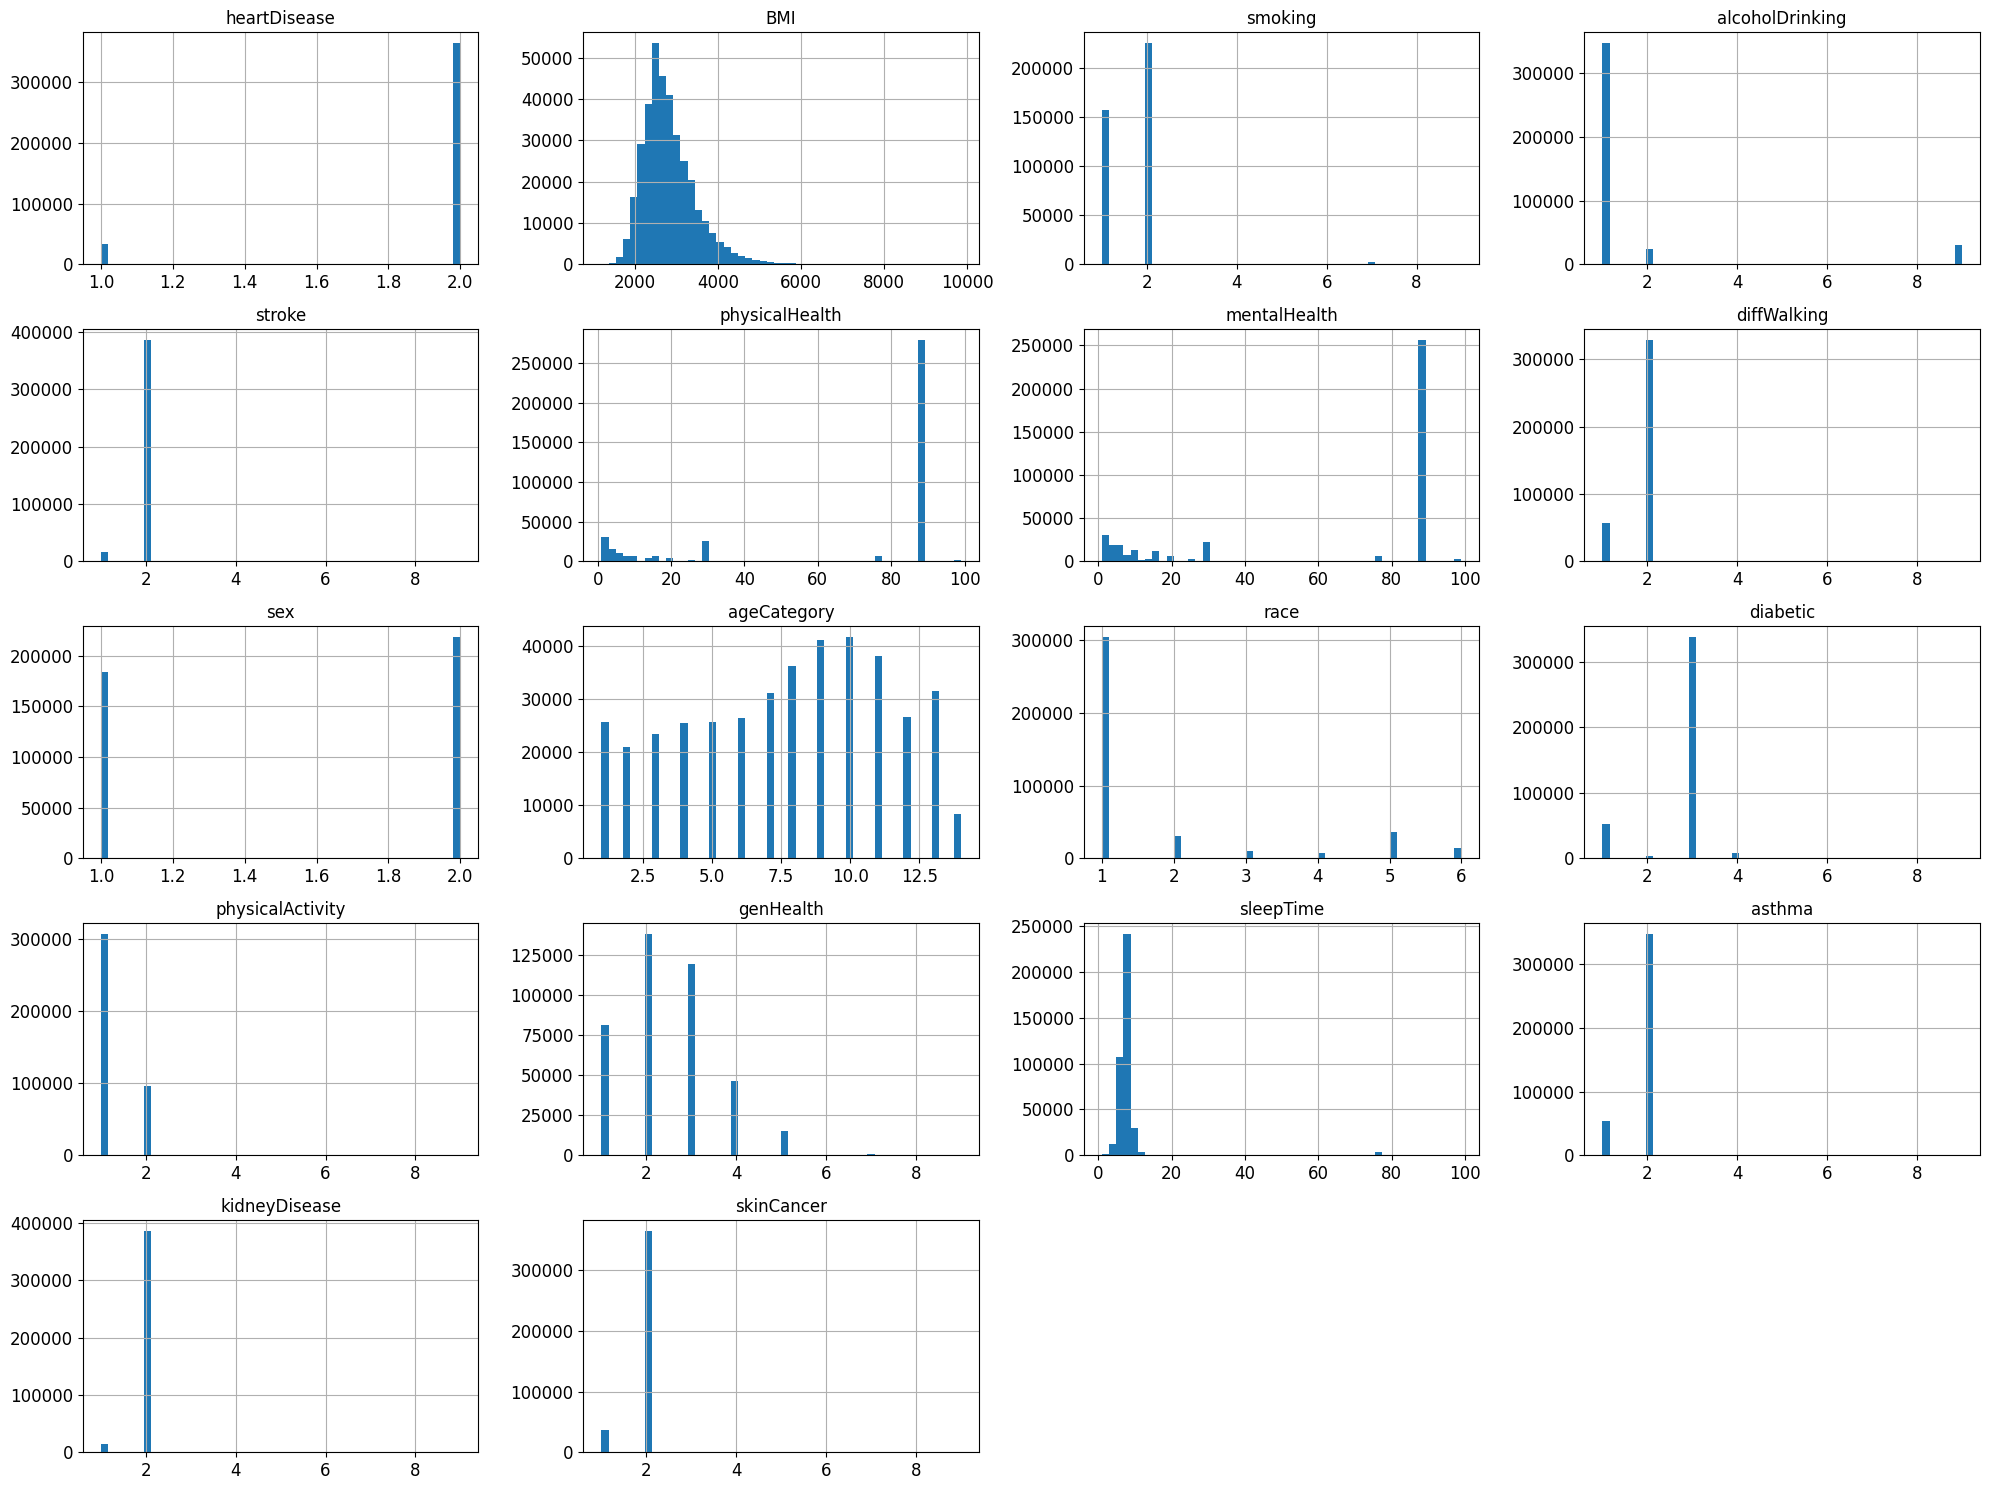

,heartDisease,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2.0,1660.0,1.0,1,2.0,3.0,30.0,2.0,2,8,1,1.0,1,2.0,5.0,1.0,2.0,1.0
1,2.0,2918.0,NaN,9,2.0,88.0,88.0,2.0,2,10,2,3.0,1,3.0,7.0,1.0,2.0,2.0
2,2.0,NaN,2.0,1,2.0,88.0,88.0,2.0,2,10,2,3.0,1,3.0,7.0,2.0,2.0,2.0
3,2.0,NaN,2.0,1,2.0,88.0,88.0,2.0,2,13,1,3.0,2,1.0,6.0,2.0,2.0,2.0
4,2.0,2034.0,2.0,1,1.0,88.0,88.0,2.0,2,13,1,3.0,1,2.0,7.0,2.0,2.0,2.0


In [4]:
# plot the data
heartDisease.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_after_downsizing")
plt.show()
heartDisease.head()

### Identifying Correlations

Saving figure correlation_matrix_plot


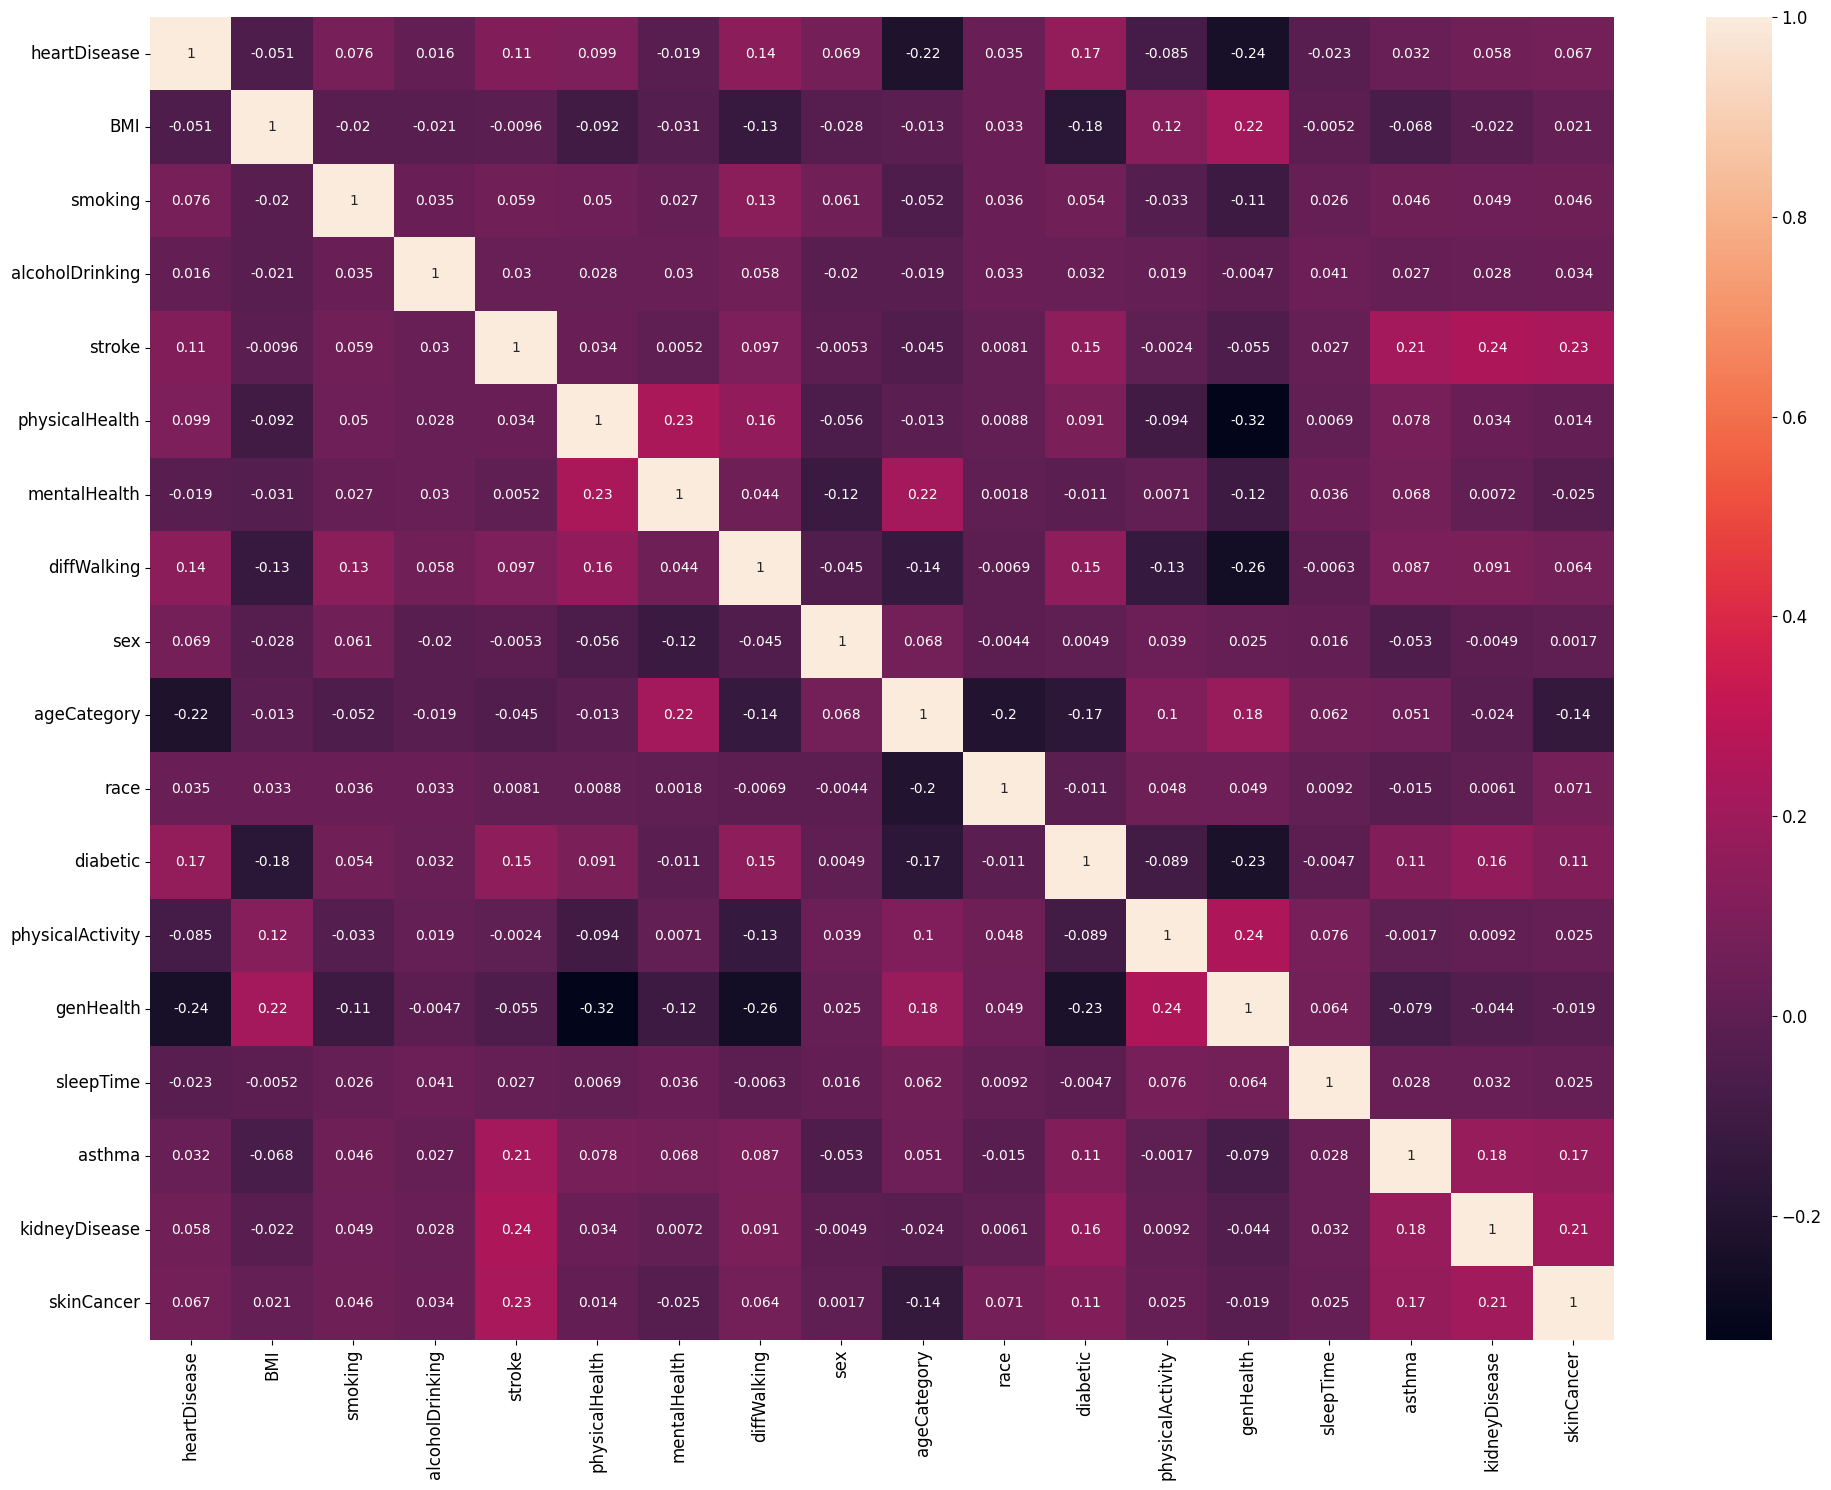

In [5]:
# print correlation matrix
corr_matrix = heartDisease.corr()
corr_matrix

# graph the correlation matrix
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
save_fig("correlation_matrix_plot")
plt.show()

### Handling Missing Values & Outliers

```python
heartDisease.dropna(subset=["Data_Value"])    # option 1: drop rows with NaNs
heartDisease.drop("Data_Value", axis=1)       # option 2: drop columns with NaNs
median = heartDisease["Data_Value"].median()  # option 3: replace NaN values with the median
heartDisease["Data_Value"].fillna(mean, inplace=True) # option 4: replace NaN values with the mean
heartDisease["Data_Value"].fillna(-1, inplace=True) # option 5: replace NaN values with  -1
```
*Note: when Data_Value = NaN, the Sample size of the denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%.*

Dropping rows with NaNs would not work with our dataset since there are not that many NaN values each row has data for many other attributes. Similarly, dropping columns with NaNs would not work since there are few NaN values and dropping the column would cause loss of data across many other attributes.

Replacing NaN values with the median is ideal for our scenario since it is less sensitive to outliers than the mean. Based on the histograms above, most topics have many outliers so it would be best to use the median over the mean.

In [6]:
print(heartDisease.isnull().sum())

# Replacing NaN values with the median of the column 
#option_3 = heartDisease.fillna(heartDisease.median(), inplace=True)

# Replacing NaN values with the mean
#option_4 = heartDisease.fillna(heartDisease.mean(), inplace=True)

# Replacing NaN values with a numeric null value of -1
#option_5 = heartDisease.fillna(-1)

heartDisease = heartDisease.dropna(axis=0, how='any')

print(heartDisease.isnull().sum()) # equals 12
heartDisease

heartDisease         3571
BMI                 41357
smoking             17860
alcoholDrinking         0
stroke                  3
physicalHealth          5
mentalHealth            5
diffWalking         15280
sex                     0
ageCategory             0
race                    0
diabetic                6
physicalActivity        0
genHealth               8
sleepTime               3
asthma                  3
kidneyDisease           6
skinCancer              3
dtype: int64
heartDisease        0
BMI                 0
smoking             0
alcoholDrinking     0
stroke              0
physicalHealth      0
mentalHealth        0
diffWalking         0
sex                 0
ageCategory         0
race                0
diabetic            0
physicalActivity    0
genHealth           0
sleepTime           0
asthma              0
kidneyDisease       0
skinCancer          0
dtype: int64


,heartDisease,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2.0,1660.0,1.0,1,2.0,3.0,30.0,2.0,2,8,1,1.0,1,2.0,5.0,1.0,2.0,1.0
4,2.0,2034.0,2.0,1,1.0,88.0,88.0,2.0,2,13,1,3.0,1,2.0,7.0,2.0,2.0,2.0
5,2.0,2658.0,1.0,1,2.0,20.0,30.0,2.0,1,10,1,1.0,1,4.0,8.0,1.0,2.0,2.0
6,2.0,2421.0,2.0,1,2.0,88.0,88.0,2.0,2,12,1,3.0,2,3.0,6.0,2.0,2.0,1.0
7,2.0,2657.0,1.0,9,2.0,15.0,10.0,2.0,2,10,2,1.0,1,4.0,6.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401953,2.0,2424.0,2.0,1,2.0,88.0,88.0,2.0,2,6,5,3.0,1,3.0,6.0,2.0,2.0,2.0
401954,2.0,3281.0,2.0,1,2.0,88.0,88.0,2.0,2,2,5,3.0,2,3.0,12.0,2.0,2.0,2.0
401955,2.0,4656.0,2.0,1,2.0,88.0,88.0,2.0,2,13,5,3.0,1,3.0,8.0,2.0,2.0,2.0
401956,2.0,2661.0,7.0,1,2.0,88.0,88.0,2.0,1,8,5,3.0,1,3.0,6.0,2.0,2.0,2.0


In [7]:
# Convert all the columns into integer
heartDisease = heartDisease.astype(int)
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352197 entries, 0 to 401957
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   heartDisease      352197 non-null  int64
 1   BMI               352197 non-null  int64
 2   smoking           352197 non-null  int64
 3   alcoholDrinking   352197 non-null  int64
 4   stroke            352197 non-null  int64
 5   physicalHealth    352197 non-null  int64
 6   mentalHealth      352197 non-null  int64
 7   diffWalking       352197 non-null  int64
 8   sex               352197 non-null  int64
 9   ageCategory       352197 non-null  int64
 10  race              352197 non-null  int64
 11  diabetic          352197 non-null  int64
 12  physicalActivity  352197 non-null  int64
 13  genHealth         352197 non-null  int64
 14  sleepTime         352197 non-null  int64
 15  asthma            352197 non-null  int64
 16  kidneyDisease     352197 non-null  int64
 17  skinCancer     

### Charts for Some of the Feature

Saving figure pie_chart


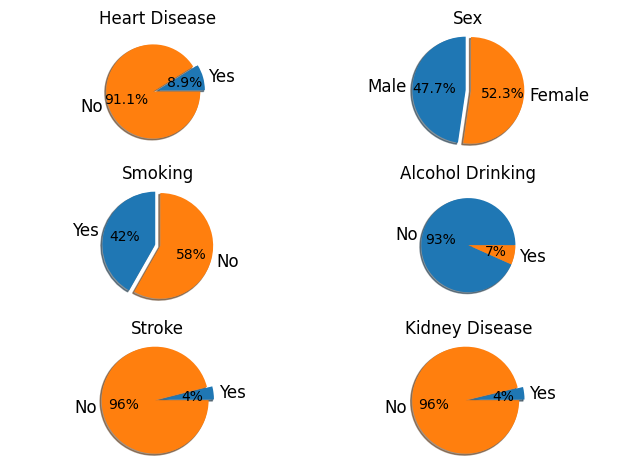

In [8]:
# pie charts for heartdisease, alcoholDrinking, smoking, sex, kidneyDisease, stroke dataset
label1 = 'Yes', 'No'
heartDiseasesize = [heartDisease.heartDisease[heartDisease['heartDisease']==1].count(), heartDisease.heartDisease[heartDisease['heartDisease']==2].count()]
label2 = 'No', 'Yes'
alcoholDrinkingsizes = [heartDisease.alcoholDrinking[heartDisease['alcoholDrinking']==1].count(), heartDisease.alcoholDrinking[heartDisease['alcoholDrinking']==2].count()]
smokingsizes = [heartDisease.smoking[heartDisease['smoking']==1].count(), heartDisease.smoking[heartDisease['smoking']==2].count()]
label4 = 'Male', 'Female'
sexsizes = [heartDisease.sex[heartDisease['sex']==1].count(), heartDisease.sex[heartDisease['sex']==2].count()]
kidneyDiseasesizes = [heartDisease.kidneyDisease[heartDisease['kidneyDisease']==1].count(), heartDisease.kidneyDisease[heartDisease['kidneyDisease']==2].count()]
strokesizes = [heartDisease.stroke[heartDisease['stroke']==1].count(), heartDisease.stroke[heartDisease['stroke']==2].count()]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Bad' or 'No')

# Make figure and
fig, axs = plt.subplots(3,2)

# title Heart Disease
axs[0,0].set_title("Heart Disease")
axs[0,0].pie(heartDiseasesize, explode=explode, labels=label1, autopct='%1.1f%%',shadow=True)
# title sex
axs[0,1].set_title("Sex")
axs[0,1].pie(sexsizes, explode=explode, labels=label4, autopct='%1.1f%%',shadow=True, 
             startangle=90)
axs[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# title Smoking
axs[1,0].set_title("Smoking")
axs[1,0].pie(smokingsizes, explode=explode, labels=label1, autopct='%1.0f%%',shadow=True,  
             startangle=90)
axs[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# title Alcohol Drinking smaller texxt
axs[1,1].set_title("Alcohol Drinking")
axs[1,1].pie(alcoholDrinkingsizes, labels=label2, autopct='%1.0f%%',shadow=True,)

# title Stroke
axs[2,0].set_title("Stroke")
axs[2,0].pie(strokesizes, explode=explode, labels=label1, autopct='%1.0f%%',shadow=True,)
axs[2,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# title Kidney Disease
axs[2,1].set_title("Kidney Disease")
axs[2,1].pie(kidneyDiseasesizes, explode=explode, labels=label1, autopct='%1.0f%%',shadow=True,)
axs[2,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

save_fig("pie_chart")
plt.show()

Saving figure line_plot


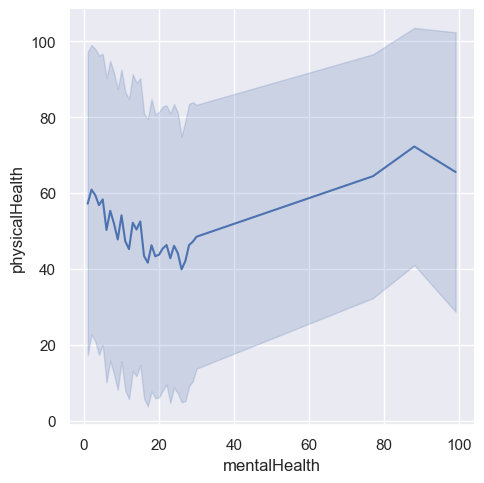

In [12]:
# line plots using continuous features dataframe
sns.set_theme(style="darkgrid")
continuous_features = heartDisease[['BMI','physicalHealth','mentalHealth','diffWalking','ageCategory','physicalActivity','genHealth','sleepTime']].copy()
sns.relplot(data=continuous_features, x='mentalHealth',y='physicalHealth', kind="line", errorbar="sd")
# save fig
save_fig("line_plot")

Saving figure Distribution_of_Body_Mass_Index


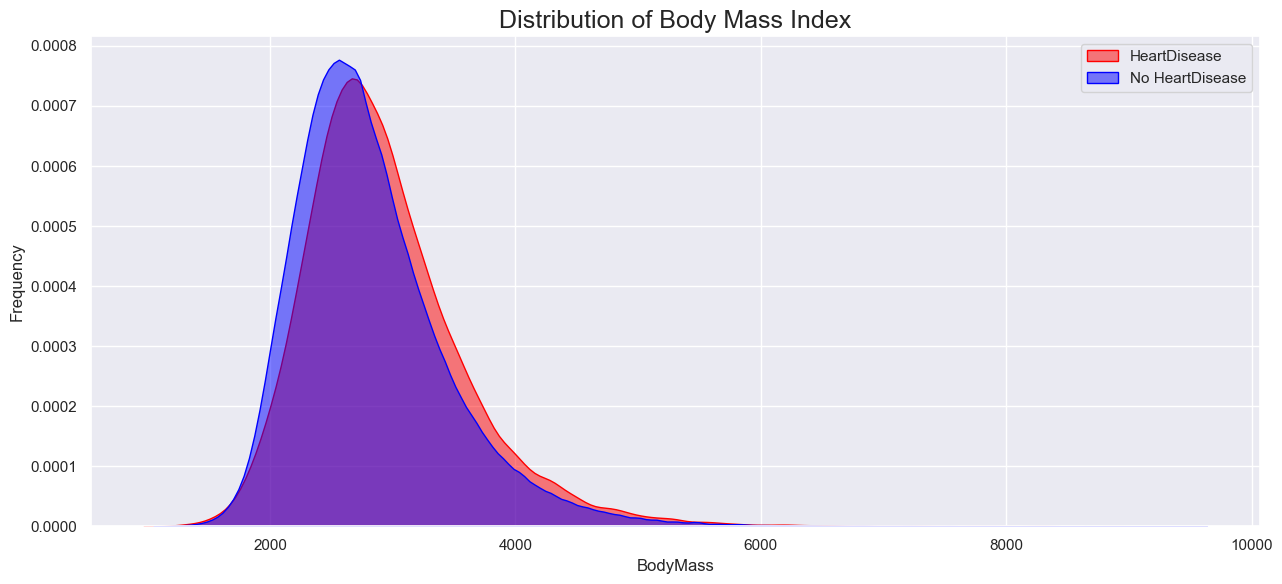

In [13]:
fig, ax = plt.subplots(figsize = (13,6))
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==1]["BMI"], alpha=0.5,fill=True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==2]["BMI"], alpha=0.5,fill = True, color="blue", label="No HeartDisease", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
save_fig("Distribution_of_Body_Mass_Index")
plt.show()


Saving figure Distribution_of_Physical_Health_Index


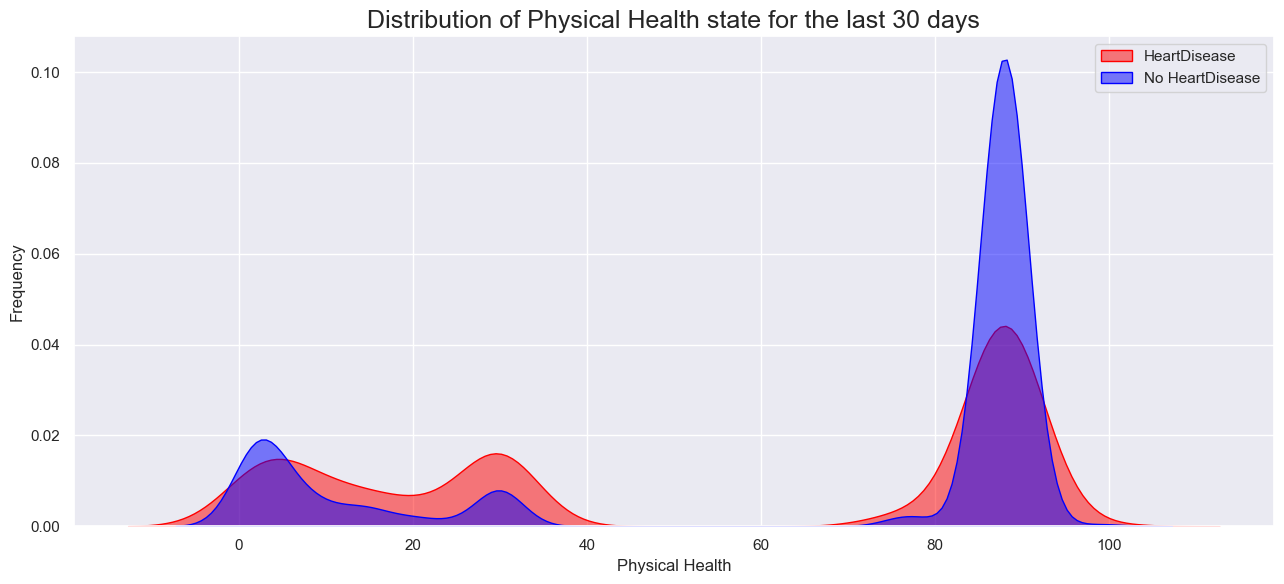

In [14]:
fig, ax = plt.subplots(figsize = (13,6))
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==1]["physicalHealth"], alpha=0.5,fill=True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==2]["physicalHealth"], alpha=0.5,fill=True, color="blue", label="No HeartDisease", ax = ax)
plt.title('Distribution of Physical Health state for the last 30 days', fontsize = 18)

ax.set_xlabel("Physical Health")
ax.set_ylabel("Frequency")
ax.legend();
save_fig("Distribution_of_Physical_Health_Index")
plt.show()


Saving figure Distribution_of_Mental_Health_Index


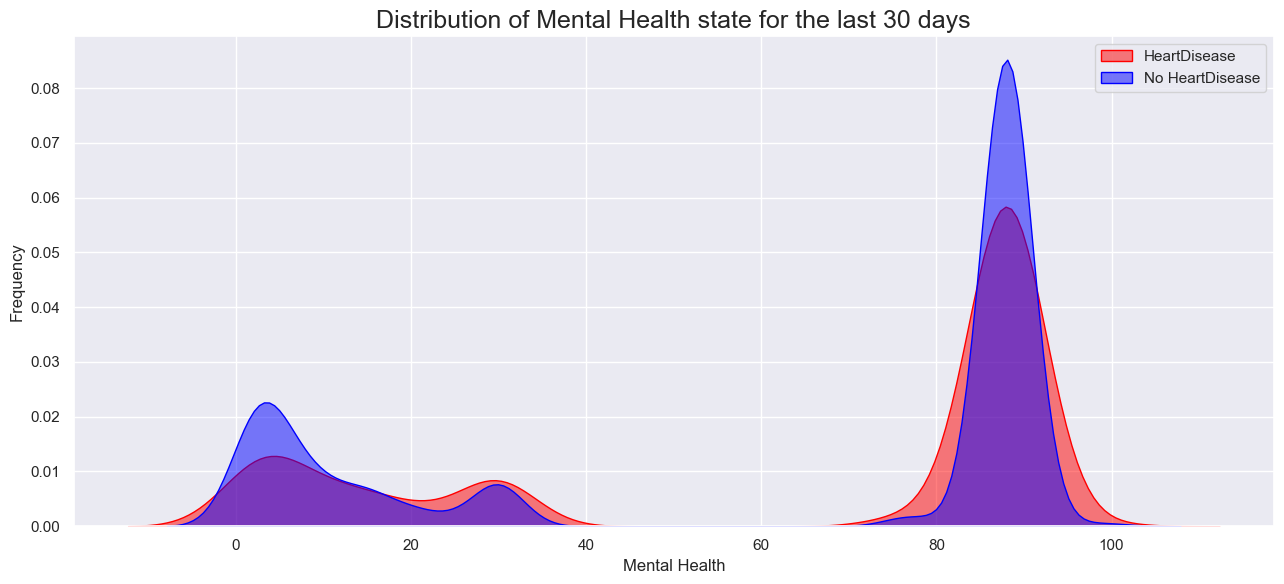

In [15]:
fig, ax = plt.subplots(figsize = (13,6))
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==1]["mentalHealth"], alpha=0.5,fill=True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==2]["mentalHealth"], alpha=0.5,fill=True, color="blue", label="No HeartDisease", ax = ax)
plt.title('Distribution of Mental Health state for the last 30 days', fontsize = 18)
ax.set_xlabel("Mental Health")
ax.set_ylabel("Frequency")
ax.legend();
save_fig("Distribution_of_Mental_Health_Index")
plt.show()

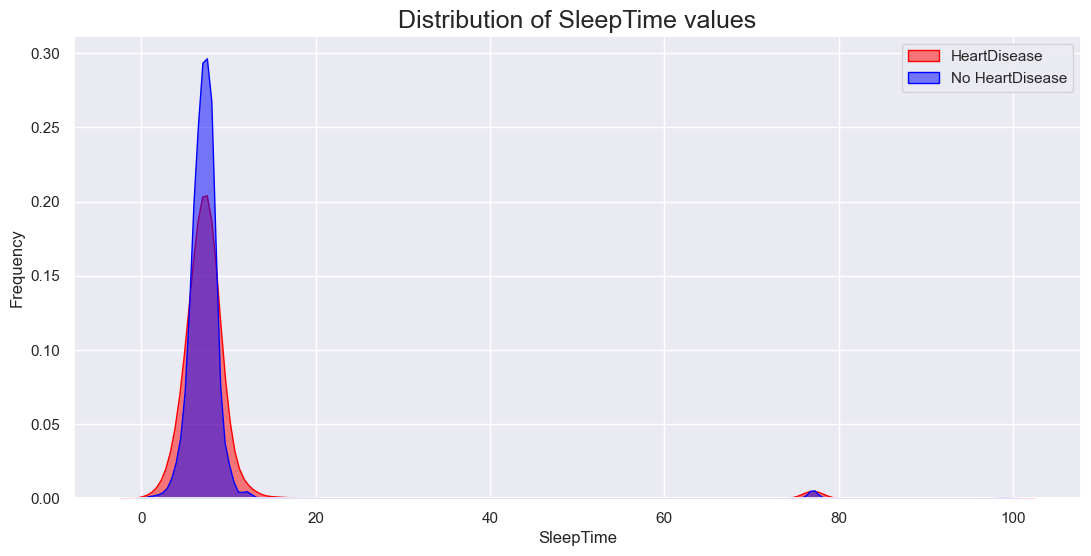

In [16]:
fig, ax = plt.subplots(figsize = (13,6))
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==1]["sleepTime"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heartDisease[heartDisease["heartDisease"]==2]["sleepTime"], alpha=0.5,fill = True, color="blue", label="No HeartDisease", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

## Dimensionality Reduction

Saving figure pca_plot_heartdisease


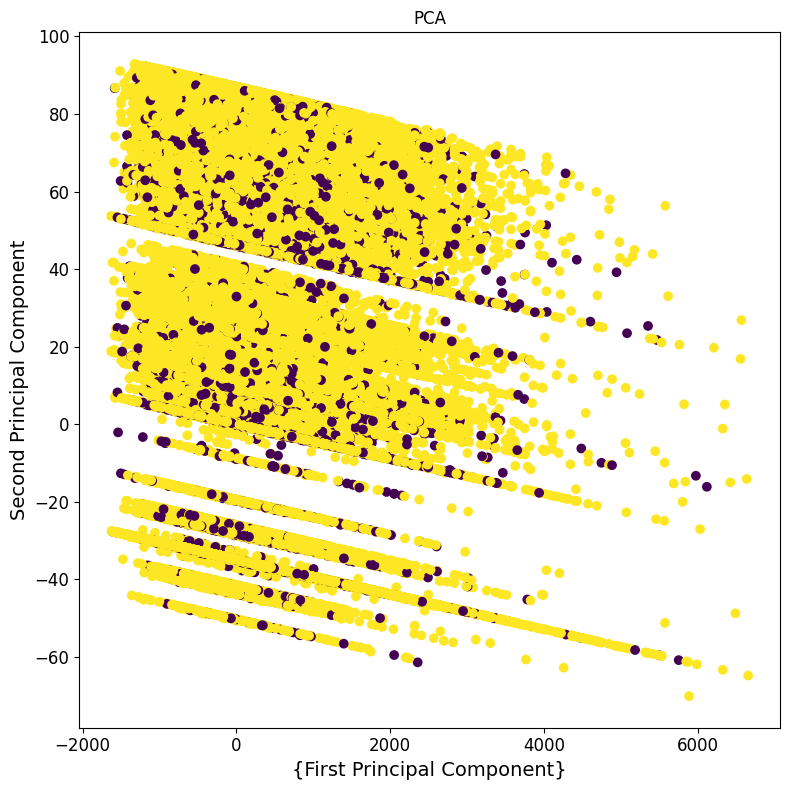

In [9]:
# Dimensionality Reduction for heartDisease data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(heartDisease.iloc[:, 1:]) # all the topics 
X_pca = pca.transform(heartDisease.iloc[:, 1:])
X_pca.shape
# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=heartDisease['heartDisease'], cmap='viridis')
plt.title(f'PCA')
plt.xlabel('{First Principal Component}')
plt.ylabel('Second Principal Component')
save_fig(f"pca_plot_heartdisease")
plt.show()


In [10]:
heartDisease.to_csv(f'dataset/afterpreprocessing/heartDisease.csv', index=False)

In [11]:
heartDisease.head()

,heartDisease,BMI,smoking,alcoholDrinking,stroke,physicalHealth,mentalHealth,diffWalking,sex,ageCategory,race,diabetic,physicalActivity,genHealth,sleepTime,asthma,kidneyDisease,skinCancer
0,2,1660,1,1,2,3,30,2,2,8,1,1,1,2,5,1,2,1
4,2,2034,2,1,1,88,88,2,2,13,1,3,1,2,7,2,2,2
5,2,2658,1,1,2,20,30,2,1,10,1,1,1,4,8,1,2,2
6,2,2421,2,1,2,88,88,2,2,12,1,3,2,3,6,2,2,1
7,2,2657,1,9,2,15,10,2,2,10,2,1,1,4,6,2,2,2
